In [1]:

from models.mask_rcnn import MRCNN
import utils
import tensorflow as tf
import gc
gc.enable()
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.debugging.set_log_device_placement(True)

mrcnn = MRCNN()

/home/gmandi/Documents/DSIT/Deep-Learning/AIRBUS-Ship_Detection/models/Mask_RCNN
/home/gmandi/Documents/DSIT/Deep-Learning/AIRBUS-Ship_Detection/models/Mask_RCNN/mask_rcnn_coco.h5.1
Num GPUs Available:  1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Using TensorFlow backend.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device



In [2]:
from DataLoader import  DataLoader
from models.mask_rcnn import DetectorDataset

dl = DataLoader()
train_df, valid_df = dl.train_split(0.1, filterNan=True)

dd_train = DetectorDataset(train_df, shape=(256, 256))
dd_train.prepare()
dd_valid = DetectorDataset(valid_df, shape=(256, 256))
dd_valid.prepare()

print(train_df.shape)
print(valid_df.shape)

(4276, 5)
(476, 5)


In [3]:
h = mrcnn.train(dd_train, dd_valid, epochs=20, layers='heads')


Starting at epoch 0. LR=0.0001

Checkpoint Path: /home/gmandi/Documents/DSIT/Deep-Learning/AIRBUS-Ship_Detection/models/Mask_RCNN/serialized/mask-rcnn20200904T0059/mask_rcnn_mask-rcnn_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2     

{'val_loss': [2.0946080684661865, 3.7826039791107178, 5.466558933258057, 2.3721933364868164, 3.66056752204895, 2.777012348175049, 3.1387956142425537, 33.799739837646484, 7.200683116912842, 2.9301624298095703], 'loss': [3.3048567110300064, 2.374962948560715, 2.430669693946838, 2.3778453874588013, 1.9311172342300416, 2.5722119653224946, 1.9229870051145554, 2.1242629927396774, 1.8704544341564178, 2.4365626710653303]}
['val_loss', 'loss']


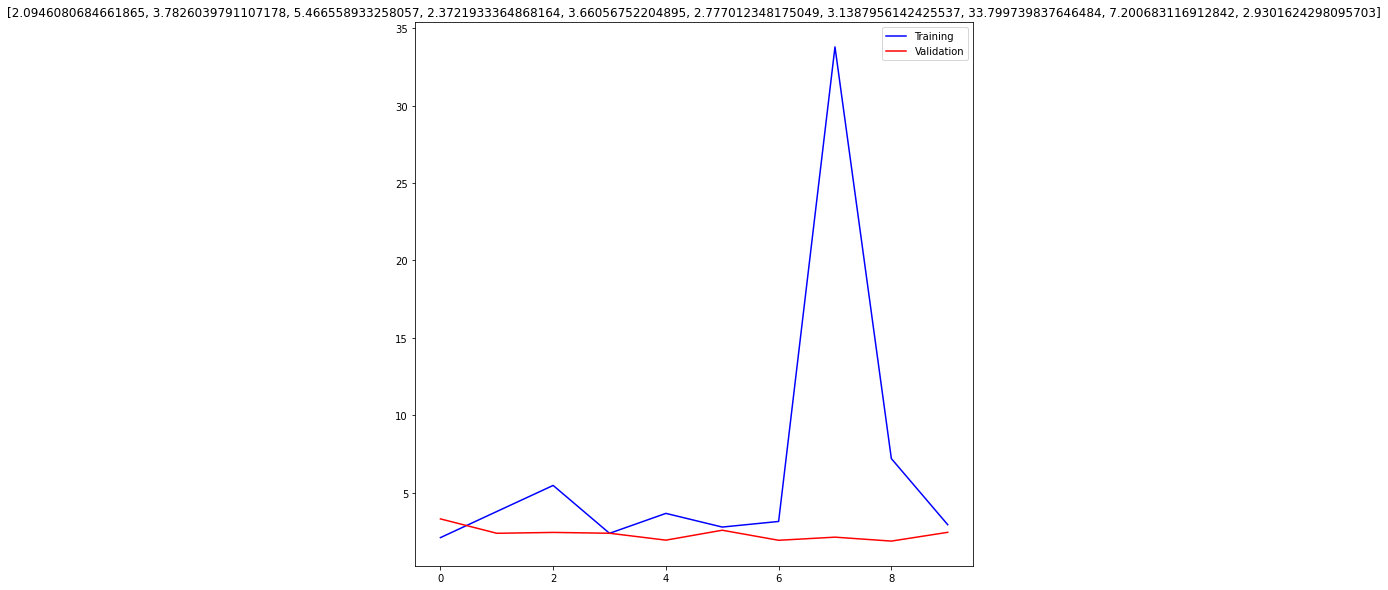

In [7]:
mrcnn.show_loss(h)


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        10
DETECTION_MIN_CONFIDENCE       0.75
DETECTION_NMS_THRESHOLD        0.0
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  384
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  384
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [384 384   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 30.0, 'rpn_bbox_loss': 0.8, 'mrcnn_class_loss': 6.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.2}
MASK_POOL_SIZE                 14
MASK_SHAPE             

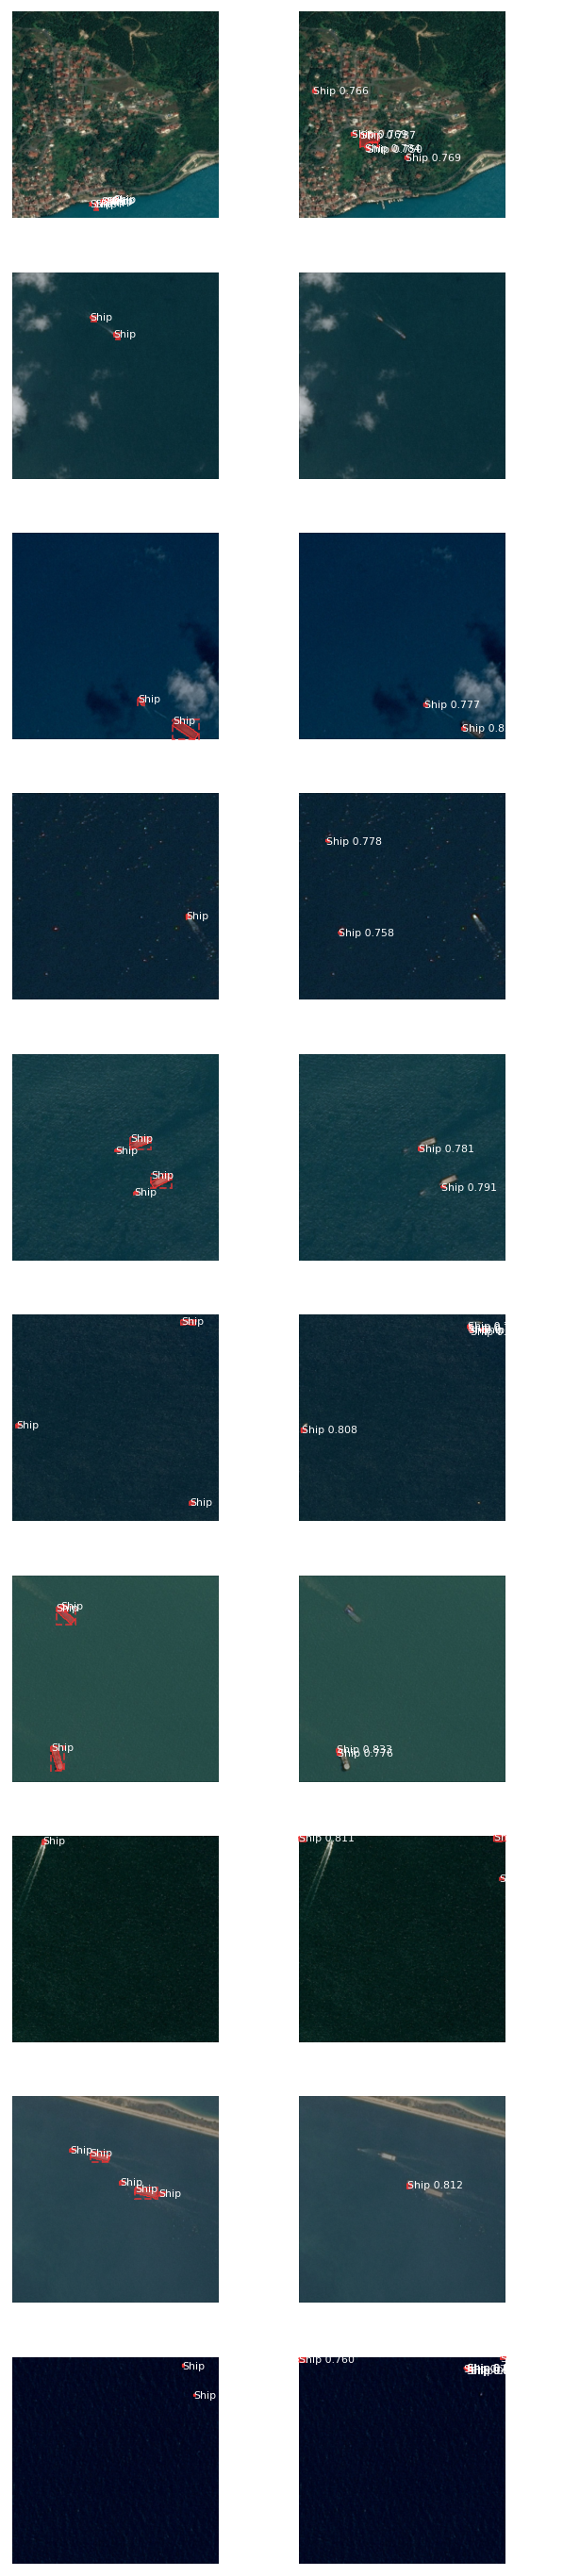

In [9]:
mrcnn = MRCNN('/home/gmandi/Documents/DSIT/Deep-Learning/AIRBUS-Ship_Detection/models/mask-rcnn20200903T2344/mask_rcnn_mask-rcnn_0001.h5')
mrcnn.examine_infer(dd_valid)